# Trabalho Prático 2
## ISEL - LEIM

## Docente - Gonçalo Marques

### Trabalho realizado por:
Mª Luísa Melo e Sampaio Nº50799
André Nº
Carlos Ceita Nº50950

In [2]:
#import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from itertools import product

### Exercicio A

No primeiro exercicio foi nos apresentado o seguinte problema: António atira uma moeda viciada N vezes, obtendo uma sequência de caras e coroas. A probabilidade de sair cara é fH. O número de vezes que ocorrem caras em N lançamentos designa-se nH. 

Caso a (3 coroas)
  Distribuição posterior de fH: Beta(alpha=1, beta=4)
  Probabilidade do lançamento N+1 ser cara: 0.2000
------------------------------
Caso b (2 cara e 1 coroas)
  Distribuição posterior de fH: Beta(alpha=3, beta=2)
  Probabilidade do lançamento N+1 ser cara: 0.6000
------------------------------
Caso c (3 cara e 7 coroas)
  Distribuição posterior de fH: Beta(alpha=4, beta=8)
  Probabilidade do lançamento N+1 ser cara: 0.3333
------------------------------
Caso d (29 cara e 271 coroas)
  Distribuição posterior de fH: Beta(alpha=30, beta=272)
  Probabilidade do lançamento N+1 ser cara: 0.0993
------------------------------


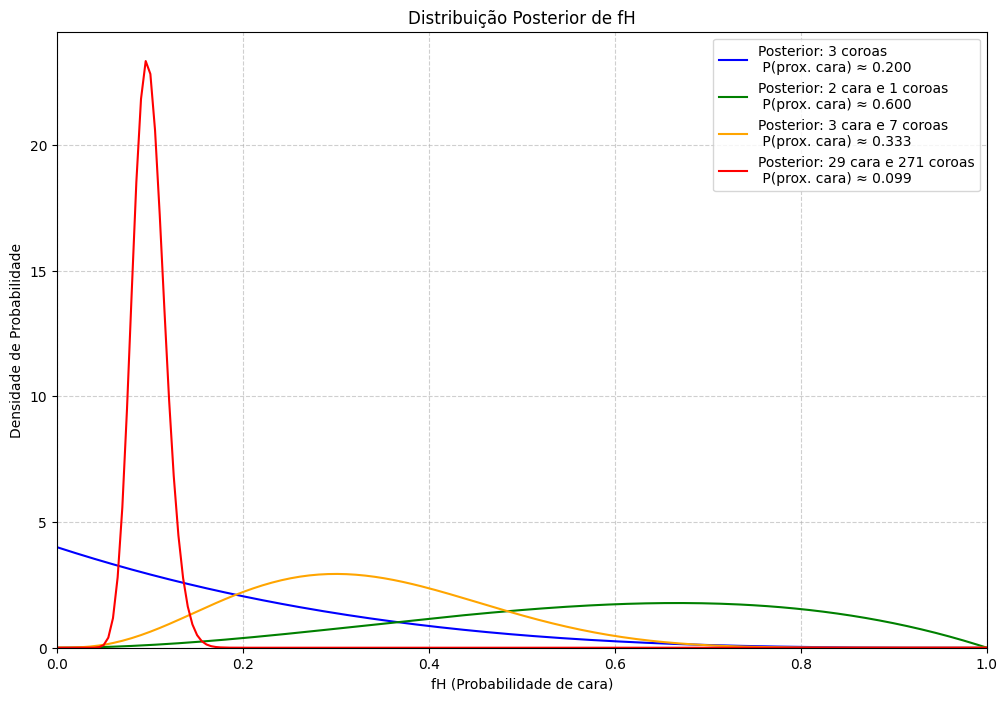

In [ ]:

def prob_cara(nH, N):
    """Calcula a probabilidade de obter cara no próximo lançamento de uma moeda
    com base no número de caras (nH) e no número total de lançamentos (N).
    Args:
        nH (int): Número de caras obtidas.
        N (int): Número total de lançamentos.
    Returns:
        float: Probabilidade de obter cara no próximo lançamento.
    """
    # a prob  é o valor esperado da distribuição beta(nH+1, N-nH+1)
    return (nH+1) / (N+2)

# casos a analisar
casos = {
    'a': {'N' : 3, 'nH': 0, 'descricao': '3 coroas'},
    'b': {'N' : 3, 'nH': 2, 'descricao': '2 cara e 1 coroas'},
    'c': {'N' : 10, 'nH':3, 'descricao': '3 cara e 7 coroas'},
    'd': {'N' : 300, 'nH':29, 'descricao': '29 cara e 271 coroas'},
}

# valores de fH para o gráfico
fH = np.linspace(0, 1, 200)

# configurar gráfico
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange', 'red']

# iterar sobre os casos
for i, (caso_key, dados_caso) in enumerate(casos.items()):
    N = dados_caso['N']
    nH = dados_caso['nH']
    descricao = dados_caso['descricao']
    # paramentros da distribuição beta
    alpha = nH + 1
    beta_param = N - nH + 1
    # calcular densidade de probabilidade posterior de fH
    posterior_pdf = beta.pdf(fH, alpha, beta_param)
    # calcular probabilidade de cara
    prob_next_cara = prob_cara(nH, N)
    # plot
    plt.plot(fH, posterior_pdf, label=f'Posterior: {descricao}\n P(prox. cara) ≈ {prob_next_cara:.3f}', color=colors[i])
    # imprimir resultados
    print(f"Caso {caso_key} ({descricao})")
    print(f"  Distribuição posterior de fH: Beta(alpha={alpha}, beta={beta_param})")
    print(f"  Probabilidade do lançamento N+1 ser cara: {prob_next_cara:.4f}")
    print("-" * 30)
    
# adicionar titulos e rotulos nos gráficos
plt.title('Distribuição Posterior de fH')
plt.xlabel('fH (Probabilidade de cara)')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 1)
plt.ylim(bottom=0)
plt.show()
   
   

Neste gráfico é nos representado as distribuições posteriores para cada caso. Quanto mais estreita e alta é a curva, mais certos estamos sobre o valor provável de fH. Quanto mais baixa e extendida, mais incerteza temos.

## Exercício B

### Alínea A

In [ ]:
# Prior: P(algoritmo)
P_algoritmo = np.array([0.4, 0.35, 0.25])  # [P(A), P(B), P(C)]

# Verossimilhança: P(NC | algoritmo)
# Cada coluna representa um algoritmo: A, B, C
P_NC_dado_algoritmo = np.array([
    [0.05, 0.10, 0.20],  # NC = 0
    [0.15, 0.20, 0.25],  # NC = 1
    [0.40, 0.40, 0.30],  # NC = 2
    [0.30, 0.20, 0.15],  # NC = 3
    [0.10, 0.10, 0.10]   # NC = 4
])

# Distribuição conjunta: P(NC, algoritmo) = P(NC | algoritmo) * P(algoritmo)
P_conjunta = P_NC_dado_algoritmo * P_algoritmo  # broadcasting
assert np.allclose(np.sum(P_conjunta), 1.0)  # valida axioma da probabilidade

# Distribuição marginal: P(NC)
P_NC = np.sum(P_conjunta, axis=1)

print("Distribuição marginal dos níveis de compressão (P_NC):\n", P_NC)




Distribuição marginal dos níveis de compressão (P_NC):
 [0.105  0.1925 0.375  0.2275 0.1   ]
Posterior P(algoritmo | NC = 3):
 [0.52747253 0.30769231 0.16483516]
Máxima Verossimilhança por algoritmo (nível mais provável): [2 2 2]
Algoritmo mais provável (MAP) para cada NC observado: [2 1 0 0 0]
Esperança (E[NC]) por algoritmo: [2.25 2.   1.7 ]
Variância (Var[NC]) por algoritmo: [0.9875 1.2    1.51  ]


### Alínea B

In [ ]:
def classifica_algoritmo(nc_observado):
    likelihoods = P_NC_dado_algoritmo[nc_observado]
    posterior = (likelihoods * P_algoritmo) / P_NC[nc_observado]
    return posterior

# Exemplo: NC = 3
posterior_nc3 = classifica_algoritmo(3)
print("Posterior P(algoritmo | NC = 3):\n", posterior_nc3)

### Alínea C

In [ ]:
# Máxima Verossimilhança: argmax P(NC | algoritmo) para cada algoritmo
max_likelihood = np.argmax(P_NC_dado_algoritmo, axis=0)
print("Máxima Verossimilhança por algoritmo (nível mais provável):", max_likelihood)

# MAP: algoritmo mais provável para cada NC observado
map_algoritmo_por_nc = np.argmax(P_conjunta, axis=1)
print("Algoritmo mais provável (MAP) para cada NC observado:", map_algoritmo_por_nc)

### Alínea D

In [ ]:
valores_nc = np.arange(5).reshape(-1, 1)  # [0, 1, 2, 3, 4]

# Valor esperado: E[NC | algoritmo]
esperanca = np.sum(P_NC_dado_algoritmo * valores_nc, axis=0)

# Variância: Var[NC | algoritmo] = E[NC²] - (E[NC])²
esperanca2 = np.sum((valores_nc**2) * P_NC_dado_algoritmo, axis=0)
variancia = esperanca2 - esperanca**2

print("Esperança (E[NC]) por algoritmo:", esperanca)
print("Variância (Var[NC]) por algoritmo:", variancia)

## Exercicio 3

### Alínea A

<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\d'
/var/folders/kc/9609xhkd1xd8xjq5315s0zzh0000gn/T/ipykernel_1449/2283529489.py:53: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Gráfico de $H_\delta(X^N)$ em função de $\delta$')


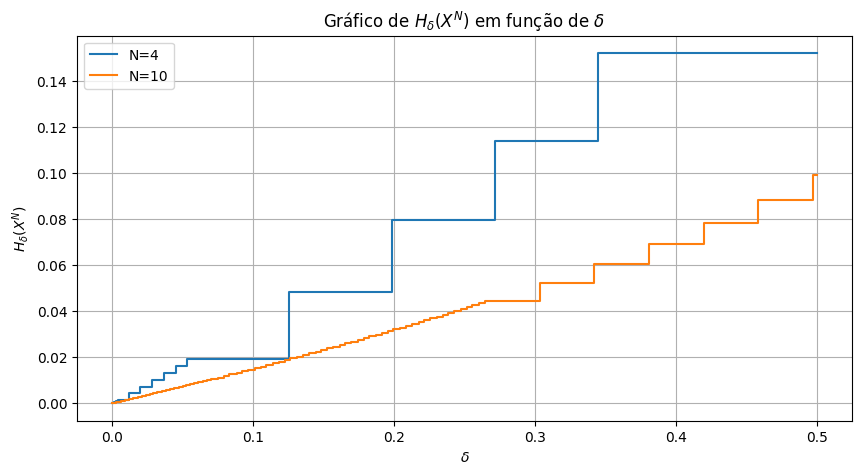

In [3]:
# Gera todas as possíveis sequências binárias de tamanho N (isto é, o espaço amostral {0,1}^N)
def gerar_x(N):
    return list(product([0, 1], repeat=N))

# Calcula a probabilidade de uma sequência x ocorrer, segundo a distribuição de Bernoulli com p0 e p1
def calcular_probabilidade(x, N, p0, p1):
    r = sum(x) # r(x): número de 1s na sequência
    P = p0 ** (N - r) * p1 ** r # Fórmula: P(x) = p0^(N - r) * p1^r
    return P

# Calcula H_delta(X^N) para uma lista de valores de delta, dado N e as probabilidades p0, p1
def calcular_H_delta(N, p0, p1, delta_vals):
    sequence = gerar_x(N) # Gera todas as sequências possíveis de N lançamentos
    prob_x = [(x, calcular_probabilidade(x, N, p0, p1)) for x in sequence] # Calcula a probabilidade de cada sequência
    prob_x.sort(key=lambda x: -x[1])  # Ordena as sequências por probabilidade decrescente
    
    H_delta_list = [] # Lista onde guardamos H_delta para cada valor de delta

    for delta in delta_vals:
        cumulative_prob = 0.0 # Probabilidade acumulada
        subset = [] # Subconjunto S_delta das sequências mais prováveis

        # Adiciona sequências ao subconjunto até atingir 1 - delta de probabilidade total
        for x, prob in prob_x:
            cumulative_prob += prob
            subset.append(prob)
            if cumulative_prob >= 1 - delta:
                break
        
        P_subset = sum(subset)# Soma das probabilidades no subconjunto
        H_delta = -np.log2(P_subset) / N # Cálculo da entropia delta-normalizada: H_delta(X^N) = -log2(P(S_delta)) / N
        H_delta_list.append(H_delta)

    return H_delta_list

# Parâmetros
p0 = 0.9
p1 = 0.1
delta_vals = np.linspace(0, 0.5, 500) # Lista de valores de delta entre 0 e 0.5

# N = 4
H4 = calcular_H_delta(4, p0, p1, delta_vals)

# N = 10
H10 = calcular_H_delta(10, p0, p1, delta_vals)

# Plot
plt.figure(figsize=(10,5))
plt.plot(delta_vals, H4, drawstyle='steps-post', label='N=4') # Gráfico de escadas para N=4
plt.plot(delta_vals, H10, drawstyle='steps-post', label='N=10') # Gráfico de escadas para N=10
plt.xlabel(r'$\delta$')
plt.ylabel(r'$H_\delta(X^N)$')
plt.title('Gráfico de $H_\delta(X^N)$ em função de $\delta$')
plt.legend()
plt.grid(True) # Adiciona uma grelha ao gráfico
plt.show()